In [1]:
import pandas as pd
print("Pandas version:", pd.__version__)


Pandas version: 3.0.1


In [5]:
# Data handling
import pandas as pd

# Market Basket Analysis
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Load the groceries dataset
data = pd.read_csv(
    "../data/Groceries_dataset.csv",
    sep=",",
    engine="python"
)

data.head()


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [11]:
# Group items by Member_number and Date
transactions = (
    data
    .groupby(['Member_number', 'Date'])['itemDescription']
    .apply(list)
)

transactions.head()


Member_number  Date      
1000           15-03-2015    [sausage, whole milk, semi-finished bread, yog...
               24-06-2014                    [whole milk, pastry, salty snack]
               24-07-2015                       [canned beer, misc. beverages]
               25-11-2015                          [sausage, hygiene articles]
               27-05-2015                           [soda, pickled vegetables]
Name: itemDescription, dtype: object

In [12]:
# Convert each row into a list of items
transactions = data.apply(
    lambda row: row.dropna().tolist(),
    axis=1
)

transactions.head()


0      [1808, 21-07-2015, tropical fruit]
1          [2552, 05-01-2015, whole milk]
2           [2300, 19-09-2015, pip fruit]
3    [1187, 12-12-2015, other vegetables]
4          [3037, 01-02-2015, whole milk]
dtype: object

In [15]:
# Group items by transaction (member + date)
transactions = (
    data
    .groupby(['Member_number', 'Date'])['itemDescription']
    .apply(list)
    .tolist()   # 🔴 THIS IS THE FIX
)


In [16]:
transactions = [[str(item) for item in basket] for basket in transactions]


In [17]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

df = pd.DataFrame(te_array, columns=te.columns_)
df.head()


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(
    df,
    min_support=0.02,
    use_colnames=True
)

frequent_itemsets.sort_values(by="support", ascending=False).head()


,support,itemsets
36,0.157923,frozenset({whole milk})
24,0.122101,frozenset({other vegetables})
28,0.110005,frozenset({rolls/buns})
32,0.097106,frozenset({soda})
37,0.085879,frozenset({yogurt})


In [19]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=0.3
)

rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()


,antecedents,consequents,support,confidence,lift


In [22]:
print("Number of rules:", rules.shape[0])
rules.head()


Number of rules: 0


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


In [24]:
frequent_itemsets = apriori(
    df,
    min_support=0.005,   # 🔴 LOWERED (0.5%)
    use_colnames=True
)

print("Frequent itemsets:", frequent_itemsets.shape[0])
frequent_itemsets.head()


Frequent itemsets: 126


,support,itemsets
0,0.021386,frozenset({UHT-milk})
1,0.008087,frozenset({baking powder})
2,0.033950,frozenset({beef})
3,0.021787,frozenset({berries})
4,0.016574,frozenset({beverages})


In [25]:
rules = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=0.1    # 🔴 LOWERED
)

print("Rules generated:", rules.shape[0])
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()


Rules generated: 19


,antecedents,consequents,support,confidence,lift
0,frozenset({bottled beer}),frozenset({whole milk}),0.007151,0.157817,0.999330
1,frozenset({bottled water}),frozenset({whole milk}),0.007151,0.117841,0.746196
2,frozenset({canned beer}),frozenset({whole milk}),0.006015,0.128205,0.811821
3,frozenset({citrus fruit}),frozenset({whole milk}),0.007151,0.134591,0.852259
4,frozenset({domestic eggs}),frozenset({whole milk}),0.005280,0.142342,0.901341


In [26]:
rules = rules[
    (rules['lift'] > 1) & 
    (rules['confidence'] > 0)
]


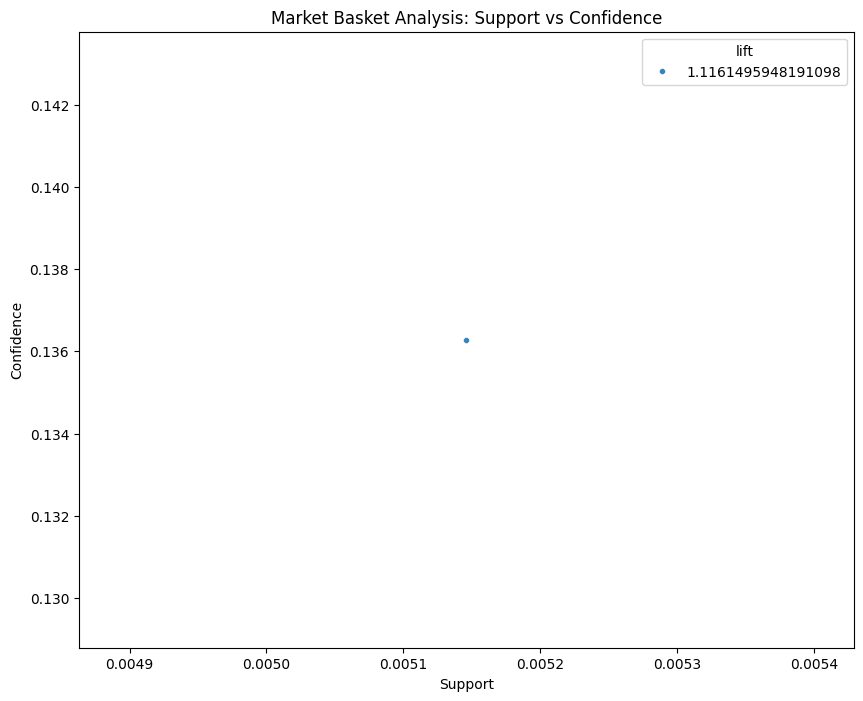

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.scatterplot(
    data=rules,
    x="support",
    y="confidence",
    size="lift",
    alpha=0.9
)

plt.title("Market Basket Analysis: Support vs Confidence")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()


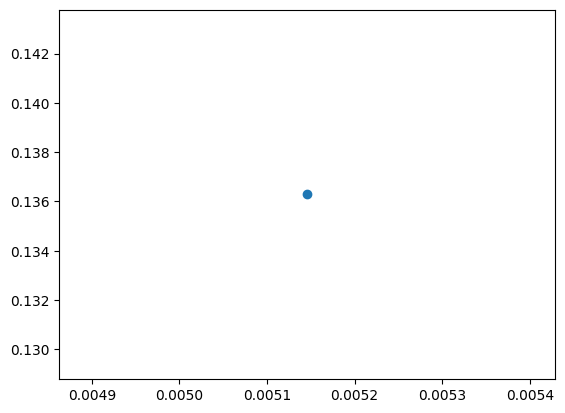

In [30]:
plt.scatter(rules['support'], rules['confidence'])
plt.show()
